# Import Libraries

In [13]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Load Data

In [14]:
df = pd.read_csv("Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [15]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

In [16]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [17]:
drop_columns = ["Name", "Age", "Cabin", "Fare", "Ticket"]
df = df.drop(columns=drop_columns, axis=1)

In [18]:
df = df.dropna(axis=1)
df

,PassengerId,Survived,Pclass,Sex,SibSp,Parch
0,1,0,3,male,1,0
1,2,1,1,female,1,0
2,3,1,3,female,0,0
3,4,1,1,female,1,0
4,5,0,3,male,0,0
...,...,...,...,...,...,...
886,887,0,2,male,0,0
887,888,1,1,female,0,0
888,889,0,3,female,1,2
889,890,1,1,male,0,0


# Data Separation as x & y

In [19]:
X = df.drop("Survived", axis=1)
y = df["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(df[features])

# Data Splitting

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


# Model Building

# Random Forest Classifier

## Feature Scaling

In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Training the Model

In [22]:
random_forest = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
random_forest.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [23]:
y_pred = random_forest.predict(X_test_scaled)

In [24]:
dfs = {'Prediction ': y_pred, 'Truth values ': y_test}
result = pd.DataFrame(dfs)

result

,Prediction,Truth values
195,1,1
746,0,0
794,0,0
723,0,0
725,0,0
...,...,...
662,0,0
875,1,1
674,0,0
632,0,1


# Evaluate the Model

## Using Accuracy Score

In [25]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7374301675977654


## Using Classification Report

In [26]:
classification_rep = classification_report(y_test, y_pred)
print('Classification Report:')
print(classification_rep)


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.82      0.81       120
           1       0.61      0.56      0.58        59

    accuracy                           0.74       179
   macro avg       0.70      0.69      0.70       179
weighted avg       0.73      0.74      0.73       179



## Using Confusion Matrix

In [27]:
# Create a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion_mat)

Confusion Matrix:
[[99 21]
 [26 33]]


# Visualize the Model

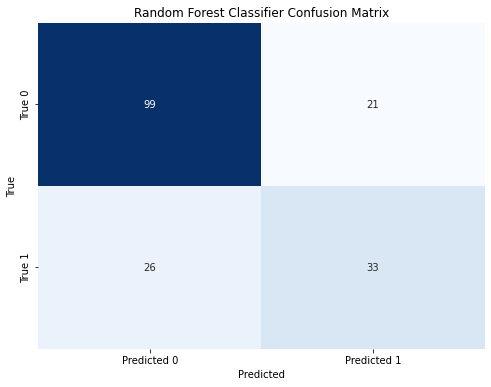

In [28]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['True 0', 'True 1'])
plt.title("Random Forest Classifier Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# K-Neighbors-Classifier

## Feature Scaling

In [29]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Training the Model

In [30]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [31]:
y_pred = knn_model.predict(X_test_scaled)

In [32]:
dfs = {'Prediction ': y_pred, 'Truth values ': y_test}
result = pd.DataFrame(dfs)

result

,Prediction,Truth values
195,1,1
746,1,0
794,1,0
723,0,0
725,1,0
...,...,...
662,0,0
875,1,1
674,0,0
632,0,1


# Evaluate the Model

## Using Accuracy Score

In [33]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.5586592178770949


## Using Classification Report

In [34]:
classification_rep = classification_report(y_test, y_pred)
print('Classification Report:')
print(classification_rep)


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.46      0.58       120
           1       0.41      0.76      0.53        59

    accuracy                           0.56       179
   macro avg       0.60      0.61      0.56       179
weighted avg       0.67      0.56      0.57       179



## Using Confusion Matrix

In [35]:
# Create a confusion matrix
confusion_mat_2 = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion_mat_2)

Confusion Matrix:
[[55 65]
 [14 45]]


# Visualize the Model

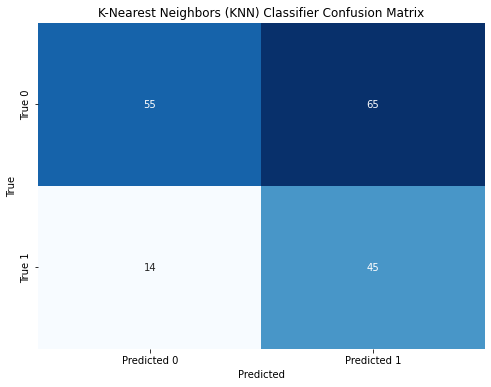

In [36]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_2, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['True 0', 'True 1'])
plt.title("K-Nearest Neighbors (KNN) Classifier Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()